In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from joblib import load, dump
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
X_train, X_test, y_train, y_test = load('../../preprocess/classification_data.joblib')

In [3]:
y_train_pred_values = []
y_pred_values = []
X_train.head()

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumWebVisitsMonth,Age,Spent,Living_With,Children,Family_Size,Is_Parent,NumTotalPurchases,Customer_For
0,0.5,0.276749,0.383838,0.111855,0.065327,0.111457,0.333333,0.049430,0.193370,0.40,0.553571,0.207937,1.0,0.000000,0.25,0.0,0.435897,0.780809
1,0.0,0.218724,0.505051,0.001340,0.030151,0.001868,0.011628,0.003802,0.024862,0.40,0.410714,0.007937,1.0,0.333333,0.50,1.0,0.102564,0.413923
2,0.0,0.742616,0.989899,0.667783,0.075377,0.257161,0.383721,0.114068,0.209945,0.10,0.428571,0.645238,1.0,0.000000,0.25,0.0,0.615385,0.569144
3,0.5,0.569239,0.484848,0.160750,0.336683,0.310710,0.771318,0.000000,0.450276,0.10,0.696429,0.461905,1.0,0.000000,0.25,0.0,0.435897,0.062088
4,0.5,0.450520,0.393939,0.028131,0.000000,0.009963,0.000000,0.000000,0.049724,0.25,0.357143,0.028571,1.0,0.666667,0.75,1.0,0.230769,0.115710


In [4]:
def model_info(y_real, y_pred):
    print('Confusion matrix: \n', confusion_matrix(y_real, y_pred))
    print('Accuracy score: ', accuracy_score(y_real, y_pred))
    print('Precision score: ', precision_score(y_real, y_pred))
    print('Recall score: ', recall_score(y_real, y_pred))
    print('F1 score: ', f1_score(y_real, y_pred))

In [5]:
def build_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    print('Train data:\n')
    y_train_pred = model.predict(X_train)
    model_info(y_train, y_train_pred)
    
    print('\n--------------------------------------\n')

    print('Test data:\n')
    y_pred = model.predict(X_test)
    model_info(y_test, y_pred)

    return model,y_train_pred, y_pred

In [6]:
knn = KNeighborsClassifier()

In [7]:
knn, y_train_pred, y_pred = build_model(knn, X_train, X_test, y_train, y_test)
y_train_pred_values.append(y_train_pred)
y_pred_values.append(y_pred)

Train data:

Confusion matrix: 
 [[1143   68]
 [ 209  251]]
Accuracy score:  0.834230999401556
Precision score:  0.786833855799373
Recall score:  0.5456521739130434
F1 score:  0.644415917843389

--------------------------------------

Test data:

Confusion matrix: 
 [[377  33]
 [ 96  52]]
Accuracy score:  0.7688172043010753
Precision score:  0.611764705882353
Recall score:  0.35135135135135137
F1 score:  0.4463519313304722


In [8]:
import math
math.ceil(math.sqrt(X_train.shape[0]))

41

In [9]:
params = {
    'n_neighbors': [20 ,25, 30, 35, 40],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

In [10]:
estimator = GridSearchCV(KNeighborsClassifier(), param_grid=params, cv=4)

In [11]:
estimator.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [20, 25, 30, 35, 40], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [12]:
estimator.best_params_

{'n_neighbors': 30, 'p': 1, 'weights': 'distance'}

In [13]:
estimator.best_score_

0.8013063233623627

In [14]:
estimator, y_train_pred, y_pred = build_model(estimator, X_train, X_test, y_train, y_test)
y_train_pred_values.append(y_train_pred)
y_pred_values.append(y_pred)

Train data:

Confusion matrix: 
 [[1210    1]
 [   3  457]]
Accuracy score:  0.997606223818073
Precision score:  0.9978165938864629
Recall score:  0.9934782608695653
F1 score:  0.9956427015250545

--------------------------------------

Test data:

Confusion matrix: 
 [[398  12]
 [ 92  56]]
Accuracy score:  0.8136200716845878
Precision score:  0.8235294117647058
Recall score:  0.3783783783783784
F1 score:  0.5185185185185186


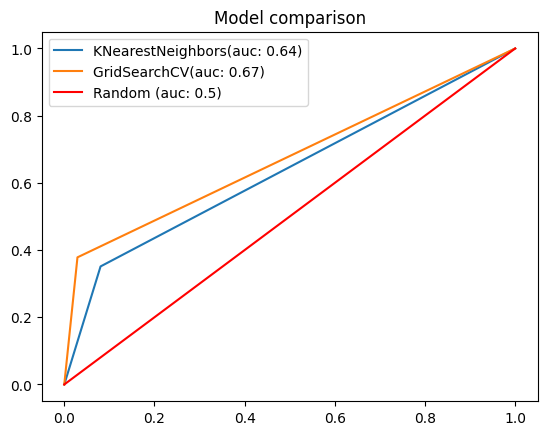

In [15]:
model_names = ['KNearestNeighbors', 'GridSearchCV']
models = [knn, estimator.best_estimator_]
for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    fpr,tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    lab = model_name + "(auc: " + str(round(auc, 2)) + ")"
    plt.plot(fpr, tpr, label=lab)

plt.plot([0, 1], [0, 1], label='Random (auc: 0.5)', color='red')
plt.title("Model comparison")
plt.legend()
plt.show()

In [16]:
accuracy_train = []
precision_train = []
recall_train = []
f1_train = []

accuracy_test = []
precision_test = []
recall_test = []
f1_test = []


for y_train_pred, y_pred in zip(y_train_pred_values, y_pred_values):
    accuracy_train.append(accuracy_score(y_train, y_train_pred))
    precision_train.append(precision_score(y_train, y_train_pred))
    recall_train.append(recall_score(y_train, y_train_pred))
    f1_train.append(f1_score(y_train, y_train_pred))

    accuracy_test.append(accuracy_score(y_test, y_pred))
    precision_test.append(precision_score(y_test, y_pred))
    recall_test.append(recall_score(y_test, y_pred))
    f1_test.append(f1_score(y_test, y_pred))

In [17]:
dump((model_names,accuracy_train,precision_train,recall_train,f1_train,accuracy_test,precision_test,recall_test,f1_test), 'knn.joblib')

['knn.joblib']